In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate

In [2]:
#Parameters
F = 1/20

alphaP = 1
betaP  = 0
gammaP = 0
alphaQ = 1
betaQ  = 0
gammaQ = 0
eps    = .003
V      = .004
F      = .3
lam    = 18 #in keV
a      = .16
b      = .18



In [56]:
#Pseudo-Analytic Solution #1    
def fv(p0, q0, x0):
    stdP = np.sqrt(alphaP+betaP*x0+gammaP*(x0**2))
    stdQ = np.sqrt(alphaQ+betaQ*x0+gammaQ*(x0**2))
    stdN = np.sqrt(F*x0/eps)
    meanN = x0/eps
    #print(meanN,stdP,stdQ,stdN)
    av = (((V/stdP)**2)+((eps/stdQ)**2)+((1/stdN)**2))/2
    bv = (V*(x0-p0)/(stdP**2)-eps*q0/(stdQ**2)-meanN/(stdN**2))
    cv = ((((x0-p0)/stdP)**2)+((q0/stdQ)**2)+((meanN/stdN)**2))/2
    f_pq_r = np.exp(((bv**2)/(4*av)-cv))/(2*math.pi*stdQ*stdP*stdN*math.sqrt(2*av))
    f_r = np.exp(-x0/lam)/lam
    ans = f_pq_r*f_r
    #ans = ((bv**2)/(4*av)-cv)
    #print(((bv**2)/(4*av)-cv))
    #print(av,bv,cv)
    #print(stdP,stdQ,stdN,av,bv,cv,(bv**2)/(4*av)-cv,ans)
    return ans

def fv_exp(p0, q0, x0):
    stdP = np.sqrt(alphaP) #np.sqrt(alphaP+betaP*x0+gammaP*(x0**2))
    stdQ = np.sqrt(alphaQ) #np.sqrt(alphaQ+betaQ*x0+gammaQ*(x0**2))
    stdN = np.sqrt(F*x0/eps)
    meanN = x0/eps
    #print(meanN,stdP,stdQ,stdN)
    av = (((V/stdP)**2)+((eps/stdQ)**2)+((1/stdN)**2))/2
    bv = (V*(x0-p0)/(stdP**2)-eps*q0/(stdQ**2)-meanN/(stdN**2))
    cv = ((((x0-p0)/stdP)**2)+((q0/stdQ)**2)+((meanN/stdN)**2))/2
    f_pq_r = np.exp(((bv**2)/(4*av)-cv))/(2*math.pi*stdQ*stdP*stdN*math.sqrt(2*av))
    f_r = np.exp(-x0/lam)/lam
    #ans = f_pq_r*f_r
    ans = ((bv**2)/(4*av)-cv)
    #print(((bv**2)/(4*av)-cv))
    #print(av,bv,cv)
    #print(stdP,stdQ,stdN,av,bv,cv,(bv**2)/(4*av)-cv,ans)
    return ans

f = lambda x0, p0, q0: fv(p0,q0,x0)
f_vec = np.vectorize(f)


f_exp = lambda x0, p0, q0: fv_exp(p0,q0,x0)
f_vec_exp = np.vectorize(f_exp)


def Fv0(p0,q0):
    ans = integrate.quad(f, 0, np.inf, args = (p0,q0,))[0]
    return ans

def Fv(p0,q0):
    sigP = math.sqrt(alphaP+betaP*(p0-(V*q0/eps))+gammaP*((p0-(V*q0/eps))**2))
    sigQ = math.sqrt(alphaQ+betaQ*(p0-(V*q0/eps))+gammaQ*((p0-(V*q0/eps))**2))
    L = ((V/(sigP**2))**2)/(2*(((V/sigP)**2)+((eps/sigQ)**2)))
    delt = -((sigP**2)/V)*((eps*q0)/(sigQ**2)+(1/F)+(V*p0)/(sigP**2))
    H = eps/(F*(((V/sigP)**2)+((eps/sigQ)**2)))
    a0 = -1/(2*sigP)+L
    b0 = p0/(sigP**2)-1/(2*F*eps)-1/lam+L*(2*delt-H)
    d0 = -L*H*((delt-H)**2)
    cubCoeff = [2*a0,(b0+4*a0*H),2*H*(b0+a0*H),b0*H*H-d0]
    solns = np.roots(cubCoeff)
    Rsolns = []
    for sol in solns:
        if np.isreal(sol):
            Rsolns.append(sol)
    loc = np.max(Rsolns)
    W0 = (a0+d0/((loc+H)**3))
    sca = np.sqrt(-1/(2*W0))
    minx = np.max((loc-3*sca),0)
    maxx = (loc+3*sca)
    ans = integrate.quad(f, minx, maxx, args = (p0,q0,))[0]
    #print(minx,maxx,ans)
    #plt.plot(np.arange(minx,maxx,20),fv(p0,q0,np.arange(minx,maxx,20)))
    #plt.show()
    return ans

In [40]:
ErTest = 10
EpTest = ErTest*(1 + (V/eps))
EqTest = ErTest

print(EpTest,EqTest,ErTest)

print(fv(EpTest,EqTest,ErTest))

23.33333333333333 10 10
0.0050108451467086755


0.5085540415884379 0.39410081212440656
0.0


C:\Users\zecco\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in sqrt


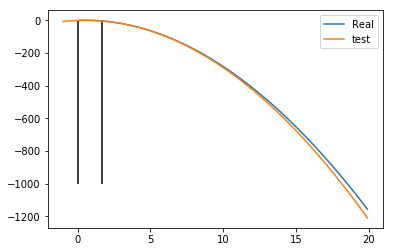

C:\Users\zecco\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in sqrt
  """


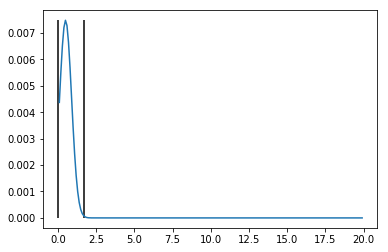

0.49999999999999956


In [73]:
ran = np.arange(-1,20,.1)

#EpTestVals = np.arange
EqTest = 1
EpTest = 1

p0=EpTest
q0=EqTest

sigP = math.sqrt(alphaP+betaP*(p0-(V*q0/eps))+gammaP*((p0-(V*q0/eps))**2))
sigQ = math.sqrt(alphaQ+betaQ*(p0-(V*q0/eps))+gammaQ*((p0-(V*q0/eps))**2))
L = ((V/(sigP**2))**2)/(2*(((V/sigP)**2)+((eps/sigQ)**2)))
delt = -((sigP**2)/V)*((eps*q0)/(sigQ**2)+(1/F)+(V*p0)/(sigP**2))
H = eps/(F*(((V/sigP)**2)+((eps/sigQ)**2)))
a0 = -1/(2*sigP**2)+L
b0 = p0/(sigP**2)-1/(2*F*eps)-1/lam+L*(2*delt-H)
d0 = -L*H*((delt-H)**2)
cubCoeff = [2*a0,(b0+4*a0*H),2*H*(b0+a0*H),b0*H*H-d0]
solns = np.roots(cubCoeff)
Rsolns = []
for sol in solns:
    if np.isreal(sol):
        Rsolns.append(sol)
loc = np.max(Rsolns)
W0 = (a0+d0/((loc+H)**3))
sca = np.sqrt(-1/(2*W0))
#print(delt,H,L)
#print(a0,b0,d0)
#print(a1,b1,c1,d1)
#print(cubQ,cubP)
print(loc,sca)

minx = np.max([(loc-3*sca),0])
maxx = (loc+3*sca)

y_vec = (f_vec_exp(ran,EpTest,EqTest))
#print(np.nanargmax(y_vec))
maxval = (ran[np.nanargmax(y_vec)])

print(minx)

plt.plot(ran,f_vec_exp(ran,EpTest,EqTest),label = "Real")
plt.plot(ran,f_exp(loc,EpTest,EqTest)+W0*(ran-loc)**2,label = "test")
plt.vlines(minx,-1000,f(loc,EpTest,EqTest))
plt.vlines(maxx,-1000,f(maxval,EpTest,EqTest))
plt.legend()
plt.show()
plt.plot(ran,(f_vec(ran,EpTest,EqTest)))
#plt.plot(ran,np.exp(f_exp(loc,EpTest,EqTest)+W0*(ran-loc)**2))
#plt.vlines(maxval,0,f(maxval,EpTest,EqTest))
plt.vlines(minx,0,f(loc,EpTest,EqTest))
plt.vlines(maxx,0,f(maxval,EpTest,EqTest))
plt.show()
print(maxval)

Ep = 0, Eq = 20


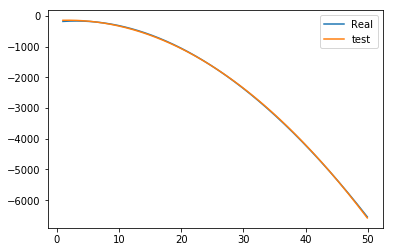

Ep = 1, Eq = 20


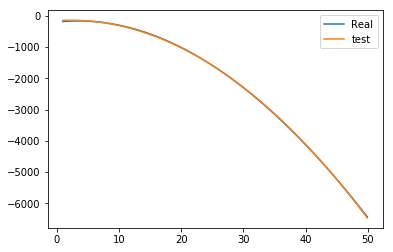

Ep = 2, Eq = 20


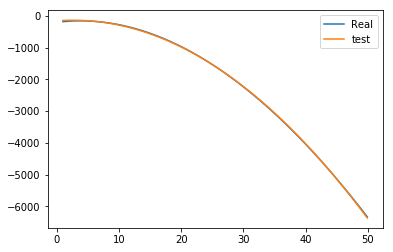

Ep = 3, Eq = 20


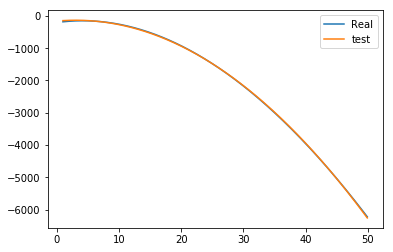

Ep = 4, Eq = 20


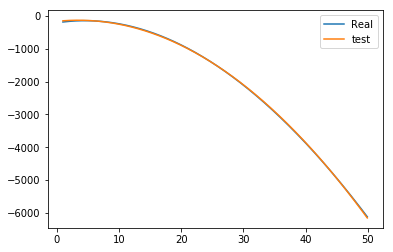

Ep = 5, Eq = 20


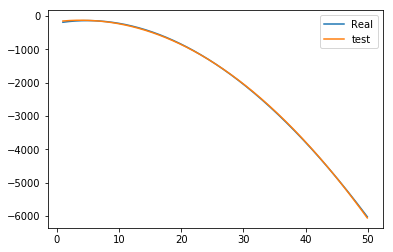

Ep = 6, Eq = 20


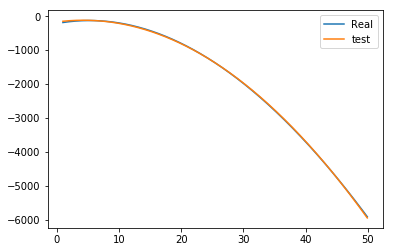

Ep = 7, Eq = 20


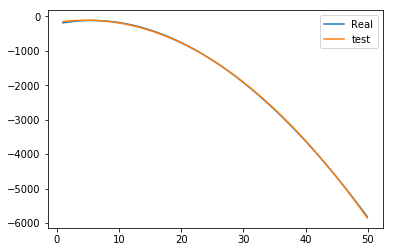

Ep = 8, Eq = 20


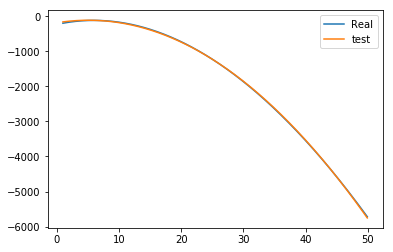

Ep = 9, Eq = 20


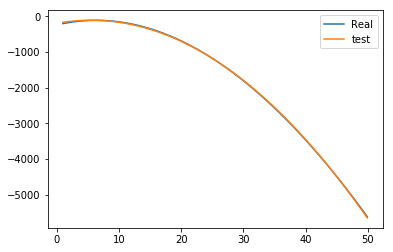

Ep = 10, Eq = 20


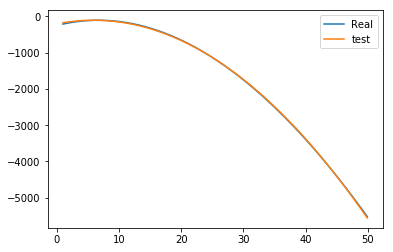

Ep = 11, Eq = 20


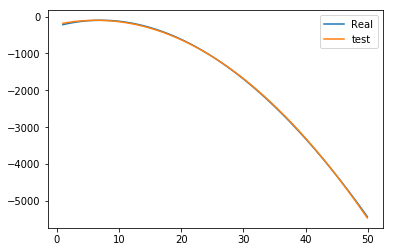

Ep = 12, Eq = 20


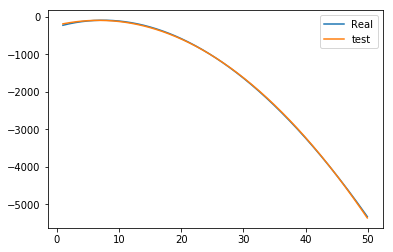

Ep = 13, Eq = 20


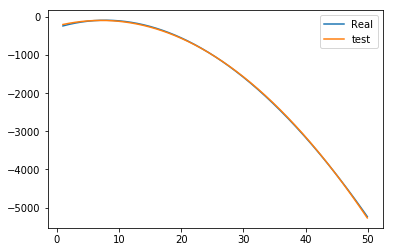

Ep = 14, Eq = 20


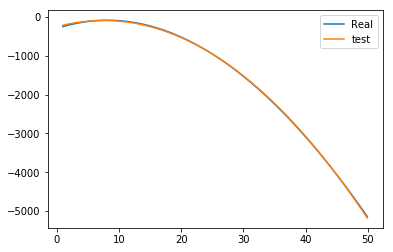

Ep = 15, Eq = 20


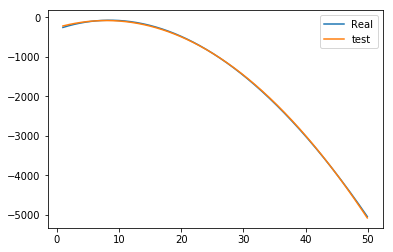

Ep = 16, Eq = 20


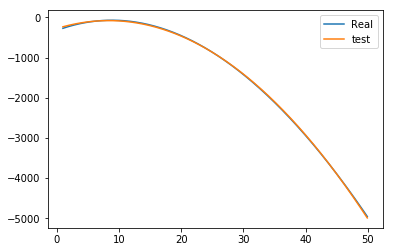

Ep = 17, Eq = 20


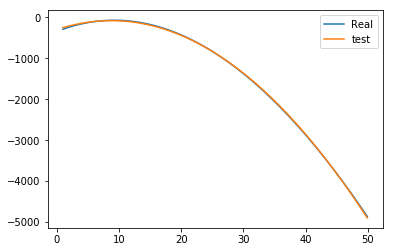

Ep = 18, Eq = 20


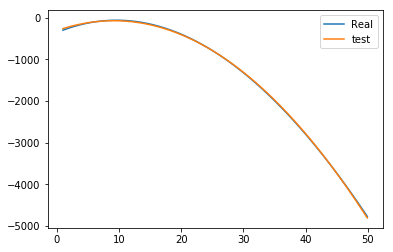

Ep = 19, Eq = 20


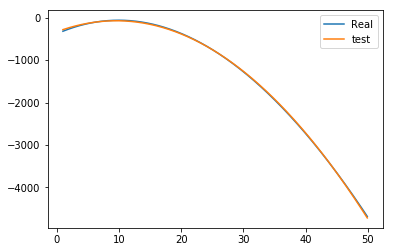

Ep = 20, Eq = 20


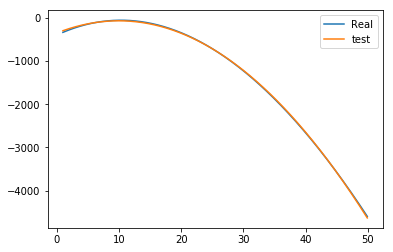

Ep = 21, Eq = 20


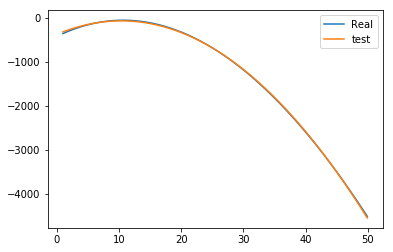

Ep = 22, Eq = 20


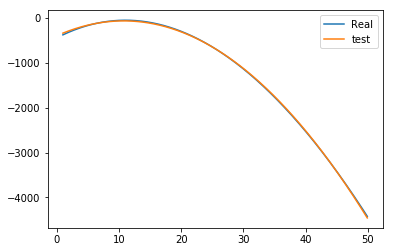

Ep = 23, Eq = 20


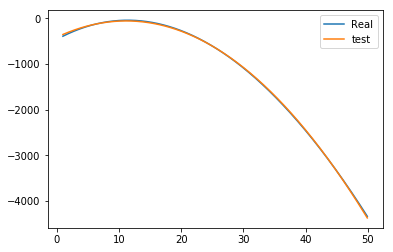

Ep = 24, Eq = 20


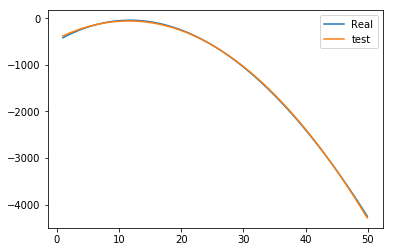

Ep = 25, Eq = 20


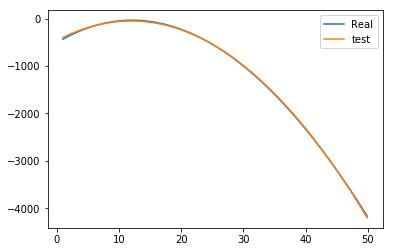

Ep = 26, Eq = 20


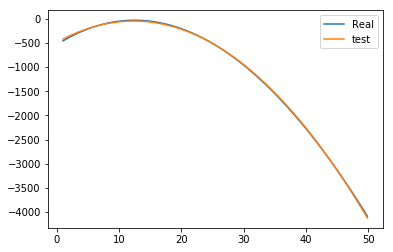

Ep = 27, Eq = 20


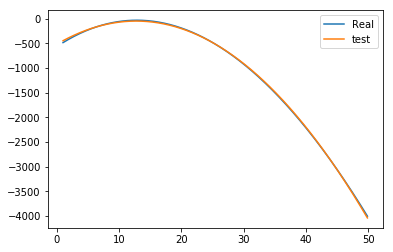

Ep = 28, Eq = 20


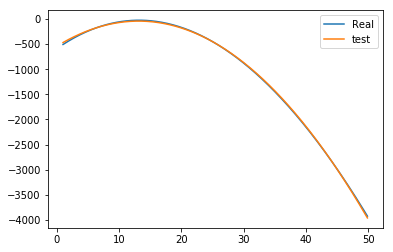

Ep = 29, Eq = 20


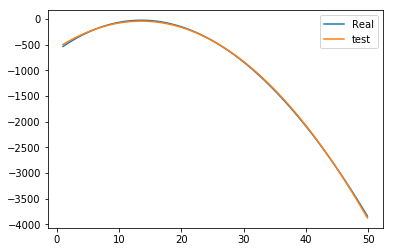

Ep = 30, Eq = 20


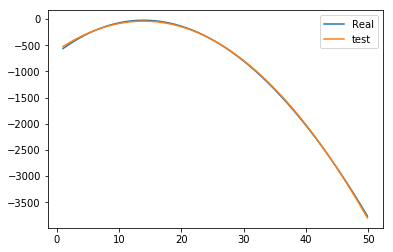

Ep = 31, Eq = 20


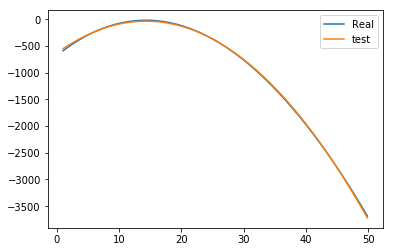

Ep = 32, Eq = 20


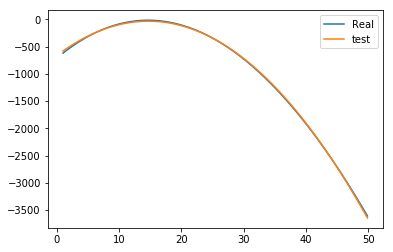

Ep = 33, Eq = 20


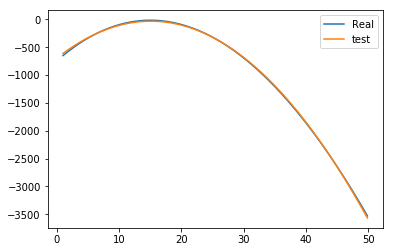

Ep = 34, Eq = 20


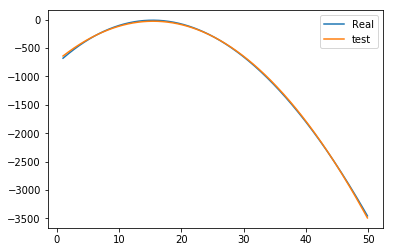

Ep = 35, Eq = 20


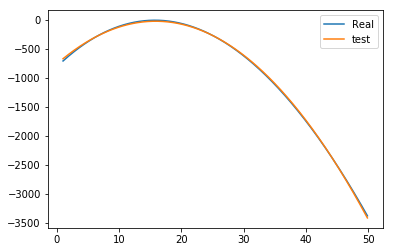

Ep = 36, Eq = 20


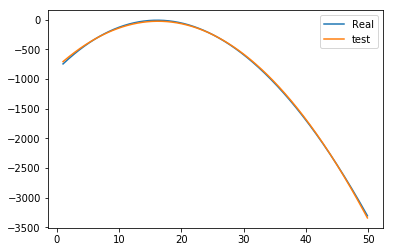

Ep = 37, Eq = 20


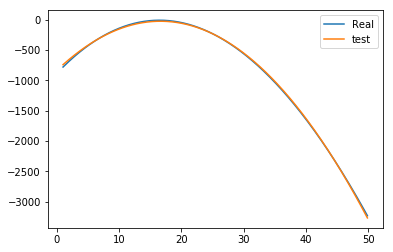

Ep = 38, Eq = 20


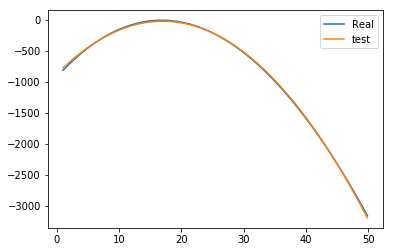

Ep = 39, Eq = 20


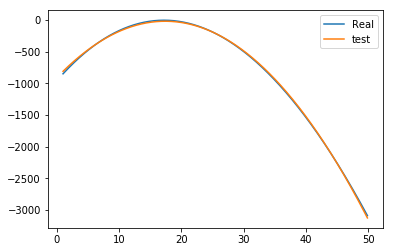

Ep = 40, Eq = 20


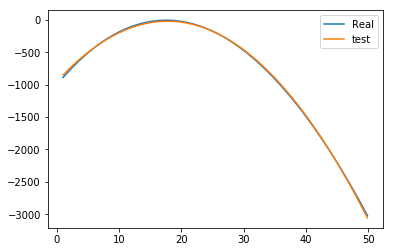

Ep = 41, Eq = 20


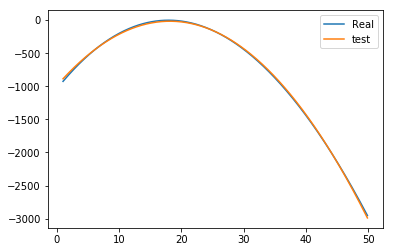

Ep = 42, Eq = 20


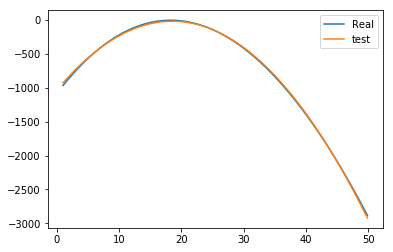

Ep = 43, Eq = 20


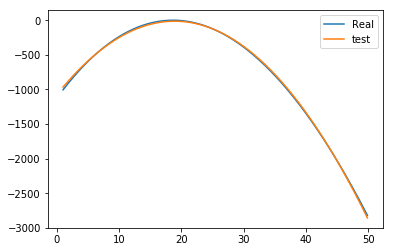

Ep = 44, Eq = 20


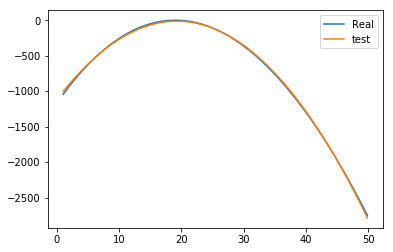

Ep = 45, Eq = 20


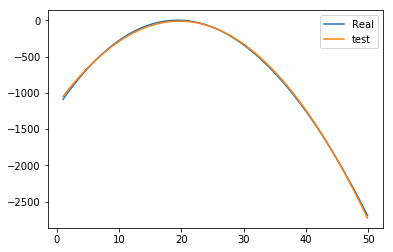

Ep = 46, Eq = 20


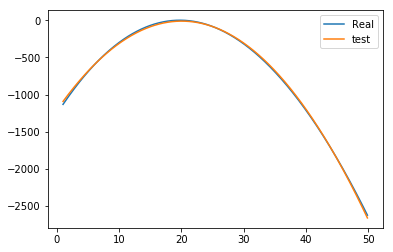

Ep = 47, Eq = 20


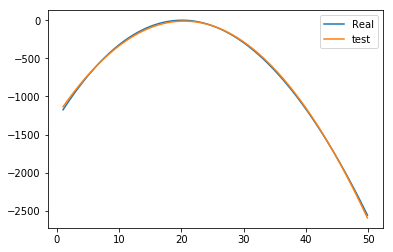

Ep = 48, Eq = 20


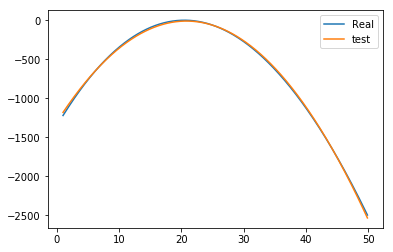

Ep = 49, Eq = 20


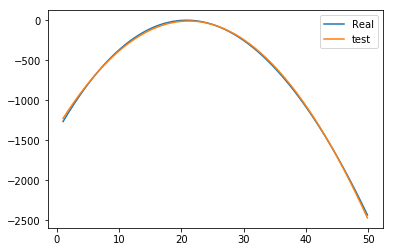

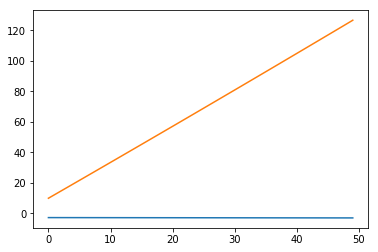

In [62]:
a_vals = []
b_vals = []
c_vals = []

for p0 in range(50):
    y_vec = (f_vec_exp(ran,p0,EqTest))
    #print(np.nanargmax(y_vec))
    maxval = (ran[np.nanargmax(y_vec)])
    a0, b0, c0 = np.polyfit(ran,y_vec,2)
    
    print("Ep = " + str(p0) + ", Eq = " + str(EqTest))
    plt.plot(ran,f_vec_exp(ran,p0,EqTest),label = "Real")
    plt.plot(ran,a0*(ran**2)+b0*ran+c0,label = "test")
    plt.legend()
    plt.show()

    q0 = EqTest
    
    L = ((V/(sigP**2))**2)/(2*(((V/sigP)**2)+((eps/sigQ)**2)))
    delt = -((sigP**2)/V)*((eps*q0)/(sigQ**2)-(1/F)-(V*p0)/(sigP**2))
    H = eps/(F*(((V/sigP)**2)+((eps/sigQ)**2)))
    a1 = -1/(2*sigP**2)+L
    b1 = p0/(sigP**2)-1/(2*F*eps)-1/lam+L*(2*delt-H)
    
    a_vals.append(a0)
    b_vals.append(b0)
    c_vals.append(c0)
    
    #print(a0,b0,c0)
    #print(a1,b1)
    #print()
    
plt.plot(range(50),a_vals)
plt.plot(range(50),b_vals)

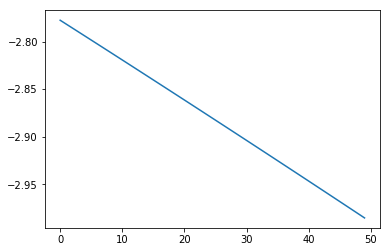

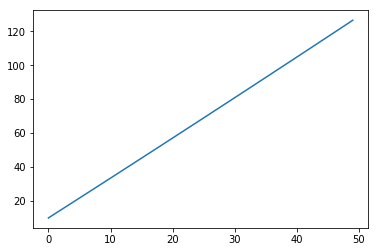

In [7]:
plt.plot(range(50),a_vals)
plt.show()
plt.plot(range(50),b_vals)
plt.show()
